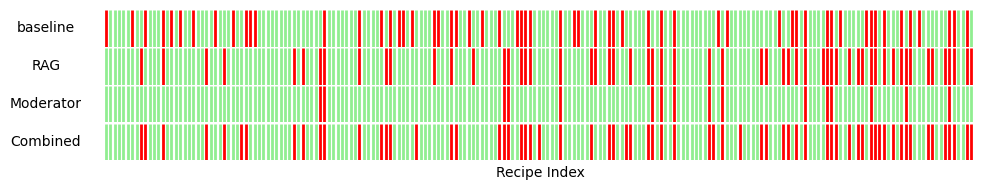

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

baseline_df = pd.read_json('../data/generated_recipes_manual_review.json')
rag_df = pd.read_json('../data/generated_recipes_rag_review.json')
moderator_df = pd.read_json('../data/generated_recipes_moderator_review.json')
combined_df = pd.read_json('../data/generated_recipes_combined_review.json')

results = pd.DataFrame()
results['baseline'] = baseline_df['correct']
results['RAG'] = rag_df['correct']
results['Moderator'] = moderator_df['correct']
results['Combined'] = combined_df['correct']

def plot_dna_bar(data):

    fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10, 2))
    for idx, col in enumerate(data.columns):
        ax = axes[idx]
        for i, val in enumerate(data[col]):
            color = 'lightgreen' if val else 'red'
            ax.vlines(i, 0, 1, color=color, linewidth=2)
        ax.set_xlim(-1, 200)
        ax.set_ylim(0, 1)
        ax.set_ylabel(col, rotation=0, labelpad=40, va='center')
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        for spine in ax.spines.values():
            spine.set_visible(False)
    plt.xlabel('Recipe Index')
    plt.tight_layout(h_pad=0.1)
    plt.show()

plot_dna_bar(results)

In [ ]:
def plot_dna_bar_with_legend(data):
    fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10, 2))

    for idx, col in enumerate(data.columns):
        ax = axes[idx]
        for i, val in enumerate(data[col]):
            color = 'lightgreen' if val else 'red'
            ax.vlines(i, 0, 1, color=color, linewidth=2)
        ax.set_xlim(-1, 200)
        ax.set_ylim(0, 1)
        ax.set_ylabel(col, rotation=0, labelpad=40, va='center')
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Add legend
    handles = [plt.Line2D([0], [0], color='lightgreen', lw=4),
               plt.Line2D([0], [0], color='red', lw=4)]
    labels = ['Correct', 'Incorrect']
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 1.05))

    plt.xlabel('Recipe Index')
    plt.tight_layout(h_pad=0.1)
    plt.show()

plot_dna_bar_with_legend(results)

In [43]:
# Count the number of True of columns 'RAG', 'Moderator' where 'Combined' is False
negative_disputes = results[(results['Combined'] == False) & (results['RAG'] == True) & (results['Moderator'] == True)].shape[0]
positive_disputes = results[(results['Combined'] == True) & ((results['RAG'] == False) | (results['Moderator'] == False))].shape[0]
print(f'Number of negative disputes: {negative_disputes}')
print(f'Number of positive disputes: {positive_disputes}')

Number of negative disputes: 12
Number of positive disputes: 4
